In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN architecture
def create_simple_cnn(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Create the model
model = create_simple_cnn()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model without augmentation
history_no_aug = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=64)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 107ms/step - accuracy: 0.3282 - loss: 1.8188 - val_accuracy: 0.5412 - val_loss: 1.2818
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 134s 97ms/step - accuracy: 0.5583 - loss: 1.2374 - val_accuracy: 0.6144 - val_loss: 1.0922
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - accuracy: 0.6351 - loss: 1.0434 - val_accuracy: 0.6644 - val_loss: 0.9741
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.6822 - loss: 0.9152 - val_accuracy: 0.6673 - val_loss: 0.9668
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 97ms/step - accuracy: 0.7148 - loss: 0.8199 - val_accuracy: 0.6912 - val_loss: 0.9055
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 109ms/step - accuracy: 0.7412 - loss: 0.7489 - val_accuracy: 0.7036 - val_loss: 0.8757
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.7581 - loss: 0.6928 - val_accuracy: 0.7155 - val_loss: 0.8284
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 96ms/step - accuracy: 0.7733 - loss: 0.645

In [ ]:
# Create an image data generator with augmentations
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,         # Rotate images by 20 degrees
    width_shift_range=0.1,     # Horizontally shift images by 10%
    height_shift_range=0.1,    # Vertically shift images by 10%
    horizontal_flip=True,      # Random horizontal flipping
    fill_mode='nearest'        # Filling pixels after shift/rotation
)

# Fit the generator on training data
datagen.fit(x_train)


In [ ]:
# Create the model
model_aug = create_simple_cnn()

# Compile the model
model_aug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with augmentation
history_aug = model_aug.fit(datagen.flow(x_train, y_train, batch_size=64),
                            epochs=20, validation_data=(x_test, y_test))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 118s 148ms/step - accuracy: 0.3008 - loss: 1.8802 - val_accuracy: 0.4721 - val_loss: 1.5114
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 134s 138ms/step - accuracy: 0.4933 - loss: 1.4092 - val_accuracy: 0.5484 - val_loss: 1.2635
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 145s 142ms/step - accuracy: 0.5534 - loss: 1.2552 - val_accuracy: 0.6256 - val_loss: 1.0681
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 138s 137ms/step - accuracy: 0.5883 - loss: 1.1604 - val_accuracy: 0.6428 - val_loss: 1.0191
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 109s 139ms/step - accuracy: 0.6060 - loss: 1.1105 - val_accuracy: 0.6666 - val_loss: 0.9697
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 138ms/step - accuracy: 0.6336 - loss: 1.0351 - val_accuracy: 0.6814 - val_loss: 0.9150
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 112s 143ms/step - accuracy: 0.6516 - loss: 0.9954 - val_accuracy: 0.6680 - val_loss: 0.9602
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 139ms/step - accuracy: 0.6619 - loss: 0.96

In [ ]:
# Evaluate both models
test_loss_no_aug, test_acc_no_aug = model.evaluate(x_test, y_test, verbose=2)
test_loss_aug, test_acc_aug = model_aug.evaluate(x_test, y_test, verbose=2)

print(f"Test accuracy (no augmentation): {test_acc_no_aug:.4f}")
print(f"Test accuracy (with augmentation): {test_acc_aug:.4f}")


313/313 - 5s - 17ms/step - accuracy: 0.7231 - loss: 1.1222
313/313 - 4s - 12ms/step - accuracy: 0.7312 - loss: 0.7853
Test accuracy (no augmentation): 0.7231
Test accuracy (with augmentation): 0.7312


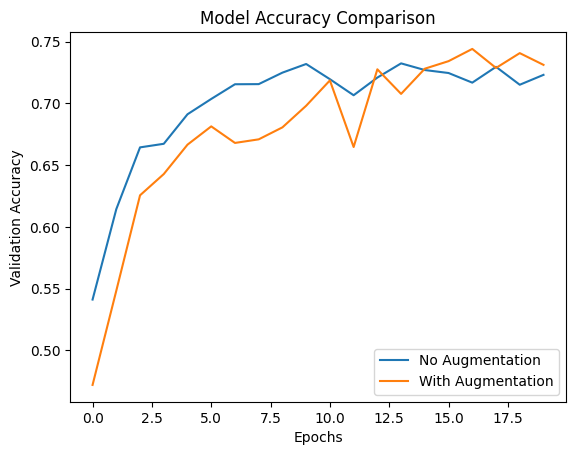

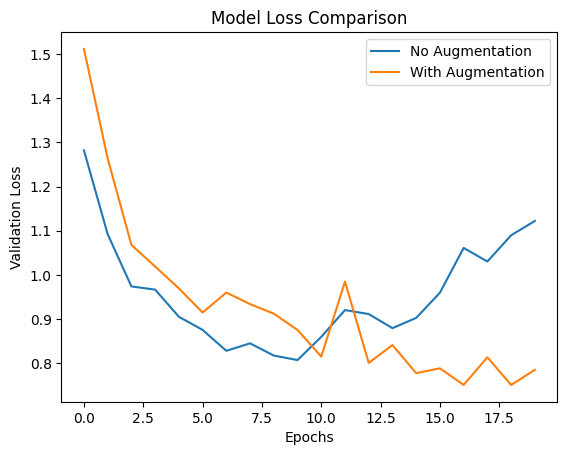

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history_no_aug.history['val_accuracy'], label='No Augmentation')
plt.plot(history_aug.history['val_accuracy'], label='With Augmentation')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history_no_aug.history['val_loss'], label='No Augmentation')
plt.plot(history_aug.history['val_loss'], label='With Augmentation')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()
